In [2]:
import pandas as pd
import numpy as np 
import math
import seaborn as sea
import matplotlib as plt


- Reading the Data

In [6]:
music_df = pd.read_csv("/workspaces/Music_Dataset/data/5254074447627840549music.csv")


In [6]:
music_df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [7]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

How many rows and columns ? 

In [8]:
music_df.shape

(17996, 17)

In [9]:
music_df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Data Dictionary 
- Artist name : 9149 artists 
- Track Name : 17996 Tracks 
- Popularity : represent how much popular the song in a scale 0-100
- danceability: represent how dancable the song range >>  0-1, 0- less dancable
- energy: represents a perceptual measure of intensity and activity range >> 0-1
- key: 11 values we assume it represent the main 
- loudness: 
- mode: values >> 0 or 1 
- speechiness: represent the presence of spoken words in a song range >>  0-1
- acousticness: music that solely or primarily uses instruments that produce sound through acoustic means range >> 
- instrumentalness: This value represents the amount of vocals which is a type of singing performed by one or more singers The closer it is to 1.0, the more instrumental the song is
- liveness: the probability of record song higher value means been recorded in live event range >> 
- valence: represent the positivness of the song range >> 0-1
- tempo : the number of beats per minute
- duration in min/ms
- time_signature: 
- class: we have 10 classes each represet a music type 

#### EDA 

- Exploring Artist name 

- how many artiset we have and how many songs for each?

In [10]:
music_df['Artist Name'].nunique()

9149

In [11]:
music_df['Artist Name'].value_counts()

Backstreet Boys    69
Westlife           60
Britney Spears     54
Omer Adam          48
Eyal Golan         48
                   ..
Rocky Trail         1
Smerz               1
lavender            1
Fear Culture        1
Beherit             1
Name: Artist Name, Length: 9149, dtype: int64

In [12]:
# we want to check is there artist have the same class for all there music? 
music_df[music_df['Artist Name'] == 'The Raincoats']

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486,0.000196,0.394,0.787,147.681,109667.0,4,6
1717,The Raincoats,Lola,50.0,0.523,0.854,9.0,-8.270,1,0.0954,0.478,0.000939,0.271,0.830,146.688,243507.0,4,1
7920,The Raincoats,Lola,50.0,0.523,0.854,9.0,-8.270,1,0.0954,0.478,0.000939,0.271,0.830,146.688,243507.0,4,6


- no Artist could have different class for there songs like The Raincoats he have songs from class 6 and class 1 

#### How many music Class and how many songs in each class?  

In [13]:
music_df.Class.value_counts()

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64

- Changing the class data type from int to string 

In [9]:
music_df['Class'] = music_df.Class.astype(str)

In [15]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [16]:
music_df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [10]:
#replacing classes with its actuall labels 
class_map={'0':'Acoustic/Folk','1':'Alt_Music','2':'Blues','3':'Bollywood','4':'Country','5':'HipHop', '6':'IndieAlt','7':'Instrumental','8':'Metal','9':'Pop','10':'Rock'}
music_df['genre']= music_df['Class'].map(class_map)
music_df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,genre
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5,HipHop
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6,IndieAlt
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5,HipHop
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10,Rock


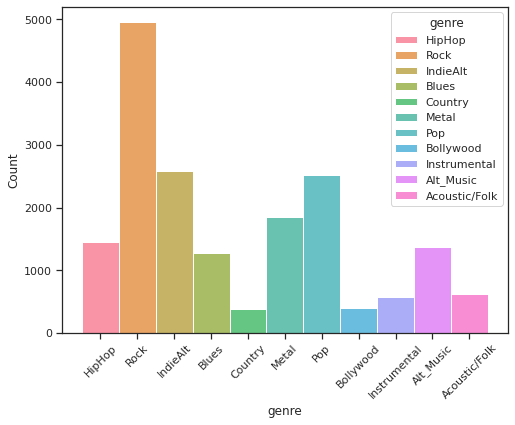

In [16]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(
    music_df,
    x="genre",hue="genre", 
    multiple="stack",
    ax=ax,
)
plt.xticks(rotation=45)
plt.show()


As shown in the plot above Class 10 have the hight count among all other classes

### what the range of Popularity?

In [18]:
print(music_df.Popularity.min())
print(music_df.Popularity.max())


1.0
100.0


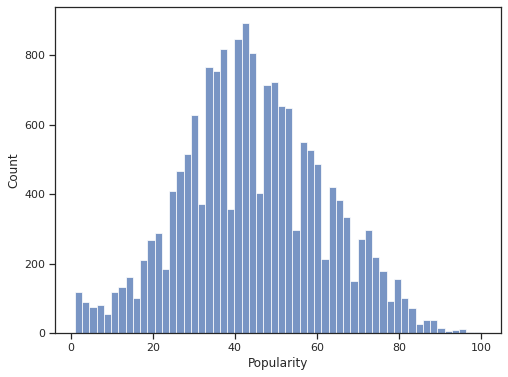

In [19]:
sns.set_theme(style="ticks")
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(
    music_df,
    x="Popularity",
    multiple="stack",
    ax=ax
)
plt.show()

We can see from the plot that Popularity ranges from 1-100 and fewer songs have a very low or a very high Popularity

# What are the songs that have Popularity of 100?

In [20]:
music_df[music_df.Popularity == 100]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
11781,Lil Nas X,MONTERO (Call Me By Your Name),100.0,0.610,0.508,8.0,-6.682,0,0.1520,0.297,NaN,0.384,0.758,178.818,137876.000,4,9
13489,Måneskin,Beggin',100.0,0.714,0.800,11.0,-4.808,0,0.0504,0.127,NaN,0.359,0.589,134.002,3.526,4,9


- Exploring key column 

In [21]:
music_df.key.value_counts()

7.0     2097
2.0     1994
9.0     1961
1.0     1680
4.0     1549
11.0    1476
5.0     1397
6.0     1190
8.0     1119
10.0    1010
3.0      509
Name: key, dtype: int64

- we have 11 keys and we are assuming that they refere to musical notes such as: do, re, me, fa 

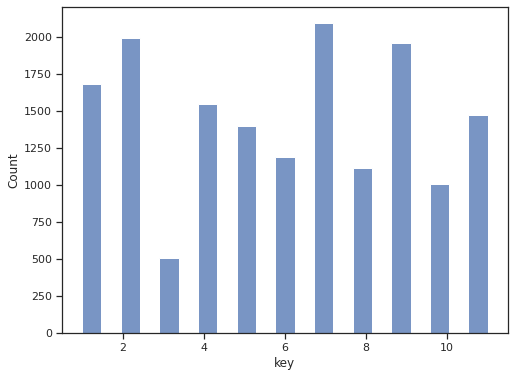

In [22]:
sns.set_theme(style="ticks")
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(
    music_df,
    x="key",
    multiple="stack",
    ax=ax
)
plt.show()

- Exploring energy column 

In [23]:
music_df.energy.max()

1.0

<AxesSubplot:xlabel='Class', ylabel='energy'>

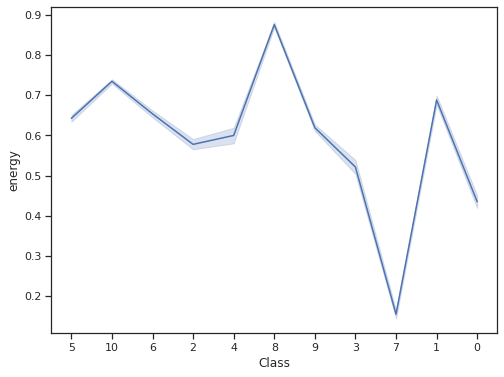

In [24]:
sns.set_theme(style="ticks")
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x="Class", y="energy",
             data=music_df, ax=ax)



energy ranges from 0-1 

- Exploring loudness

In [25]:

print(music_df.loudness.min())
print(music_df.loudness.max())
music_df.loudness.mean()

-39.952
1.355


-7.910659757723952

Loudest music followed which class:

<AxesSubplot:xlabel='Class', ylabel='loudness'>

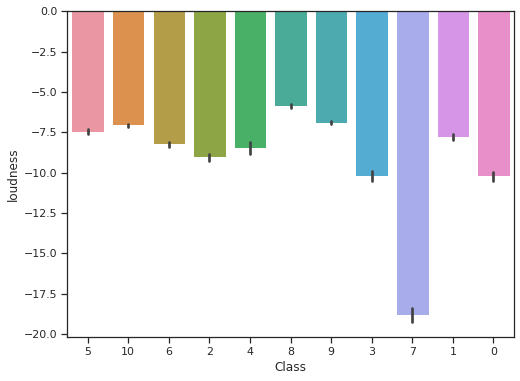

In [26]:
sns.set_theme(style="ticks")
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Class", y="loudness",
             data=music_df, ax=ax)

In [27]:
music_df['mode'].value_counts()

1    11459
0     6537
Name: mode, dtype: int64

In [28]:
music_df[music_df.loudness >= 0]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.00353,0.006040,0.172,0.241,152.952,208133.0,4,6
1297,Prince Rapid,Gladiator - Instrumental,9.0,0.780,0.972,6.0,0.119,0,0.2530,0.01070,0.029600,0.100,0.958,137.056,198000.0,4,5
2503,ILLENIUM,First Time (feat. iann dior) - Kayzo Remix,56.0,0.402,0.962,9.0,0.943,1,0.0656,0.01050,NaN,0.356,0.527,155.015,166452.0,4,10
3639,BVDLVD,WHATS UP?,42.0,0.500,0.967,1.0,1.355,1,0.4460,0.15900,0.000237,0.358,0.292,80.034,168160.0,4,10
3925,Justice,We Are Your Friends - Justice Vs Simian,61.0,0.615,0.970,9.0,1.342,0,0.1190,0.01040,0.384000,0.178,0.507,122.993,262773.0,4,1
5535,Justice,We Are Your Friends - Justice Vs Simian,61.0,0.615,0.970,9.0,1.342,0,0.1190,0.01040,0.384000,0.178,0.507,122.993,262773.0,4,6
10336,Void Of Vision,Decay,40.0,0.529,0.992,8.0,0.101,1,0.1310,0.00101,0.004710,0.341,0.392,110.050,192273.0,4,8
12390,Dillon Francis,"Hello There - ETC!ETC! x Whyel's ""It's not a p...",32.0,0.399,0.922,7.0,0.732,1,0.0486,0.08000,0.001650,0.906,0.329,110.137,192000.0,4,10


##### Handling missing values 

How many missing values we have? 

In [29]:
music_df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

Is there any duplicate? 

In [30]:
music_df.duplicated().sum()

0

For Popularity we will fill in null value with mean Popularity, as we have seen in the plot most songs fill in the middle. 

In [31]:
music_df["Popularity"].fillna(music_df.Popularity.mean(), inplace=True)

In [32]:
music_df.Popularity.isnull().sum()

0

- For instrumentalness column we will use knnImputer using 6 neighbors

In [33]:
from sklearn.impute import KNNImputer

kn = KNNImputer(n_neighbors=6)
music_df['instrumentalness']=kn.fit_transform(music_df[['instrumentalness']])


In [34]:
music_df.instrumentalness.isnull().sum()

0

- For key column we will also use knnImputer using 6 neighbors

In [35]:
music_df['key']=kn.fit_transform(music_df[['key']])

In [36]:
music_df.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [40]:
music_df.head(1)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.0171,0.177562,0.0849,0.899,134.071,234596.0,4,5


In [46]:
music_df.groupby(['Class']).agg({'loudness':'mean', 'energy':'mean', 'tempo':'mean', 'time_signature':"mean"}).sort_values(by='loudness', ascending=False) 

,loudness,energy,tempo,time_signature
Class,,,,
8,-5.892958,0.875775,128.338720,3.899137
9,-6.913168,0.619265,119.132265,3.960777
10,-7.075504,0.734751,125.569565,3.940796
5,-7.469736,0.642619,117.940362,3.991016
1,-7.781162,0.688304,124.873452,3.941733
6,-8.249528,0.653723,123.230027,3.944724
4,-8.486959,0.600072,123.003475,3.932817
2,-9.055176,0.577879,122.748731,3.834906
3,-10.213672,0.521456,113.519682,3.820896


- Save clean version of the music dataset  
We will export this clean version to different dataset >> music_dataset_cleaned.csv

In [38]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [39]:
#music_df.to_csv("data/music_dataset_cleaned.csv")